In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
# data from 21.04.2020 - 21.04.2024
data = pd.read_excel("KursnaLista.xlsx")

<Axes: >

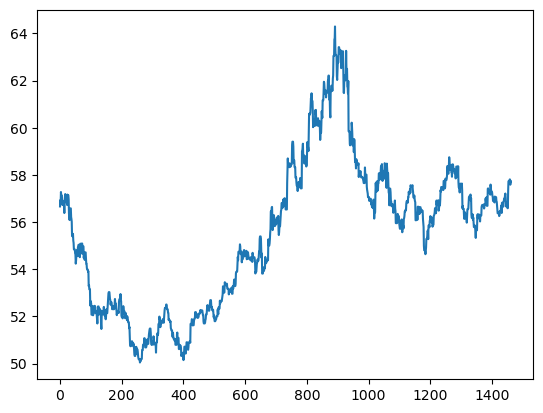

In [5]:
data.Rate.plot()

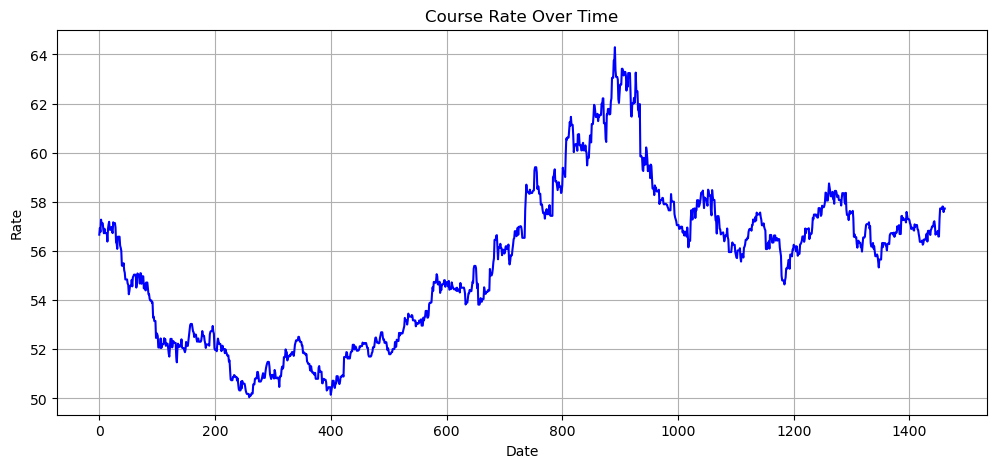

In [13]:
# time series plot
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Rate'], color='blue')
plt.title('Course Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.grid(True)
plt.show()

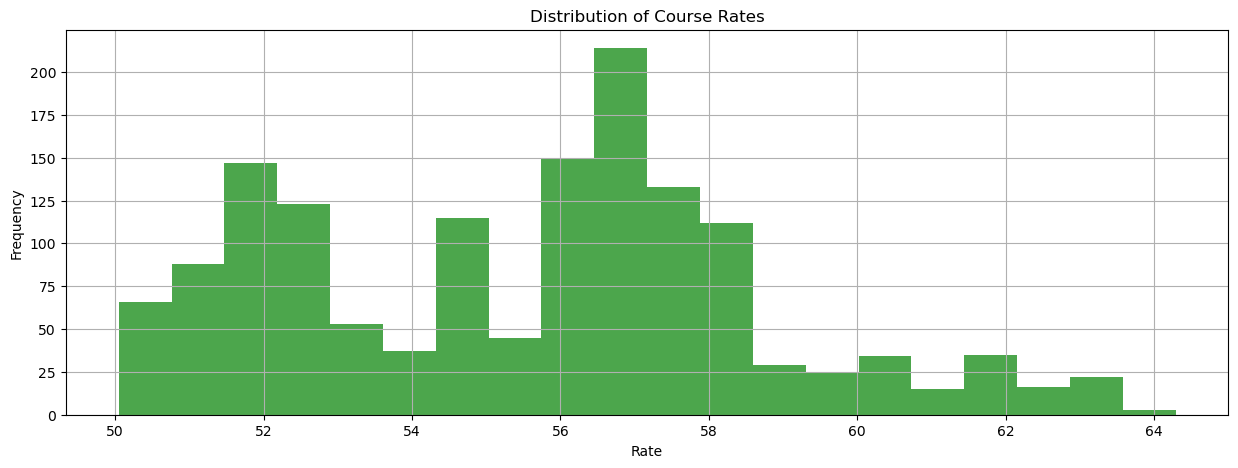

In [15]:
#histogram
plt.figure(figsize=(15, 5))
plt.hist(data['Rate'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Course Rates')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

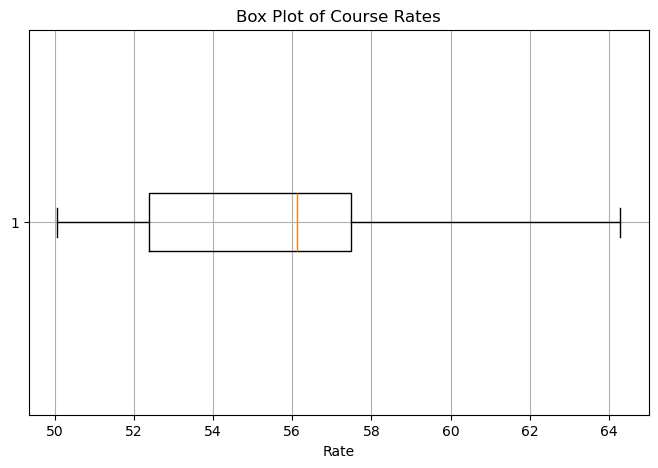

In [16]:
#box plot
plt.figure(figsize=(8, 5))
plt.boxplot(data['Rate'], vert=False)
plt.title('Box Plot of Course Rates')
plt.xlabel('Rate')
plt.grid(True)
plt.show()

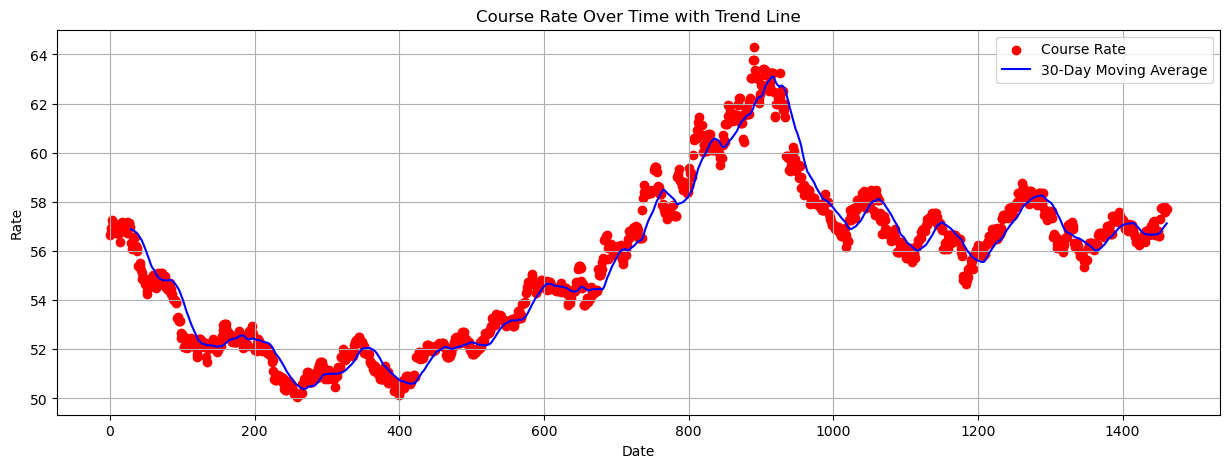

In [18]:
# scatter plot 
plt.figure(figsize=(15, 5))
plt.scatter(data.index, data['Rate'], color='red', label='Course Rate')
plt.plot(data.index, data['Rate'].rolling(window=30).mean(), color='blue', label='30-Day Moving Average')
plt.title('Course Rate Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
past = 7
future = 7

In [20]:
money = data.Rate

In [21]:
money

0       56.6633
1       56.9300
2       56.7728
3       57.2739
4       57.1250
         ...   
1457    57.8078
1458    57.8041
1459    57.5850
1460    57.7255
1461    57.7255
Name: Rate, Length: 1462, dtype: float64

In [22]:
# taking random days 
# taking 7 days from the past and 7 days from the future 
money[100-past:100]

93    53.2864
94    53.3279
95    53.1487
96    53.1487
97    53.1487
98    52.4617
99    52.6543
Name: Rate, dtype: float64

In [23]:
# 7 future days
money[100:100+future]

100    52.6183
101    52.5386
102    52.0723
103    52.0723
104    52.0723
105    52.0723
106    52.4394
Name: Rate, dtype: float64

In [24]:
# data set to train model
# first day cannot be taken as there will not be data for past 7 days 
# model will be trained on past 7 days and future 7 days in time series 

# calculate length of data 
len(money)


1462

In [25]:
# taking data set
start = past
end = len(money) - future
print(f"There is {len(money)} values, and we will lok from {past} till {end} value")

There is 1462 values, and we will lok from 7 till 1455 value


In [26]:
table = []

# take past and future for each of those days 
for i in range(start,end) :
    s = money[(i-past):(i+future)]
    table.append(list(s))

In [27]:
past_columns = []
for i in range(past):
    past_columns.append(f"past_{i}")


future_columns = []
for i in range(future):
    future_columns.append(f"future_{i}")

In [28]:
data_frame = pd.DataFrame(data = table, columns = (past_columns + future_columns)) 

In [29]:
data_frame

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,56.6633,56.9300,56.7728,57.2739,57.1250,57.1250,57.1250,56.8525,56.7206,56.9036,56.7258,56.7258,56.7258,56.7258
1,56.9300,56.7728,57.2739,57.1250,57.1250,57.1250,56.8525,56.7206,56.9036,56.7258,56.7258,56.7258,56.7258,56.3829
2,56.7728,57.2739,57.1250,57.1250,57.1250,56.8525,56.7206,56.9036,56.7258,56.7258,56.7258,56.7258,56.3829,56.8872
3,57.2739,57.1250,57.1250,57.1250,56.8525,56.7206,56.9036,56.7258,56.7258,56.7258,56.7258,56.3829,56.8872,57.0734
4,57.1250,57.1250,57.1250,56.8525,56.7206,56.9036,56.7258,56.7258,56.7258,56.7258,56.3829,56.8872,57.0734,57.1872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,57.2100,57.0296,56.6643,56.7245,56.7245,56.7245,56.8188,56.5888,56.5888,57.3166,57.7295,57.7295,57.7295,57.7073
1444,57.0296,56.6643,56.7245,56.7245,56.7245,56.8188,56.5888,56.5888,57.3166,57.7295,57.7295,57.7295,57.7073,57.8078
1445,56.6643,56.7245,56.7245,56.7245,56.8188,56.5888,56.5888,57.3166,57.7295,57.7295,57.7295,57.7073,57.8078,57.8041
1446,56.7245,56.7245,56.7245,56.8188,56.5888,56.5888,57.3166,57.7295,57.7295,57.7295,57.7073,57.8078,57.8041,57.5850
